In [ ]:
# TASK 01 - Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.
# TASK 02 - Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
# TASK 03 - Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.
# TASK 04 - Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.
# TASK 05 - Develop a model that can accurately recognize food items from images and estimate their calorie content, enabling users to track their dietary intake and make informed food choices.

# <h><center><b>**Prodigy InfoTech Internship Program**</b></center></h>
### <h><center><b>**TASK 02 - Customer Segmentation**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/PRODIGY_ML_02**

<h1><b>Customer Segmentation</b></h1>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*p9t-VYFneDs6Bt00F1Z8Fw.png" style="width:700px;height:450px;">

# **Data Set Problems** 🤔

👉 Create a **K-means clustering algorithm to group customers** of a retail store based on their purchase history

---

👨‍💻 **The machine learning models used in this project is: K-Means** 

# **Introduction**

It is an Unsupervised Machine learning problem where we do not predict any numerical or categorical values like Supervised machine learning algorithms, instead we group items/elements present in the dataset on the basis of similarity. In this project, we are segmenting Customers of a mall on the basis of their spending score, age and income. It is typically significant for the businessmen to understand which kind of customer to target to increase the mall's profitability. It helps in better understanding about the product that should be brought to help sale. Nowadays Companies want to know their customers better so that they can provide useful customers with some goodies and it becomes easy for companies to send customers special offers meant to encourage and attract them to buy more products.

Earlier Customer segmentation was a challenging and time-consuming task. This is because for segmenting customers we need to perform hours of manual poring on different tables and querying the data in hopes of finding ways to group customers together. So to overcome this task we will use machine learning to segment customers. So, we will segment customers using machine learning algorithms, so that it will be useful for businessmen in personalized marketing and provide their customers’ relevant offers and deals.

# **Project outline**

- Installing and importing all the required libraries
- Importing the CSV file
- Data Description
- Data Processing
- Exploratory Data Analysis (EDA)
- K-Means Clustering for ‘Age’ and ‘Spending Score’
- K-Means Clustering for ‘Income’ and ‘Spending Score’
- K-Means Clustering for ‘Age’, ‘Income’ and ‘Spending Score’
- Before K-Means & After K-Means
- Summary

# Installing and importing all the required libraries

In [2]:
# Importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Importing the CSV file

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Description

**Here are the complete names of the columns of customer dataset:**

- `CustomerID` - Unique ID of each customer visiting the mall.
- `Gender` - Gender of each customer visiting the mall (e.g. Male, Female)
- `Age` - Age of each customer visiting the mall.
- `Annual Income (k$)` - Income of each customer visiting the mall (measured in thousand $).
- `Spending Score (1-100)` - Score of each customer out of 100 on the basis of their spending.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Data Processing

In [8]:
# Dropping unnecessary features
df.drop("CustomerID", axis = 1, inplace = True)

In [9]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory Data Analysis (EDA)

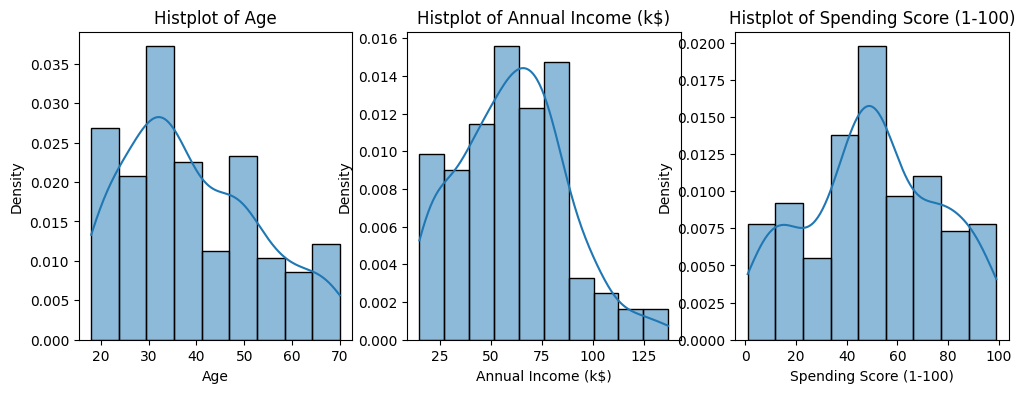

In [10]:
# HistPlot
# This displays which age group and income group of people is spending more
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.histplot(df[x], kde=True, stat="density")
  plt.title('Histplot of {}'.format(x))
plt.show()

# People of Age group (30-35) is purchasing more in the mall
# People of Income (50-80) is purchasing more in the mall

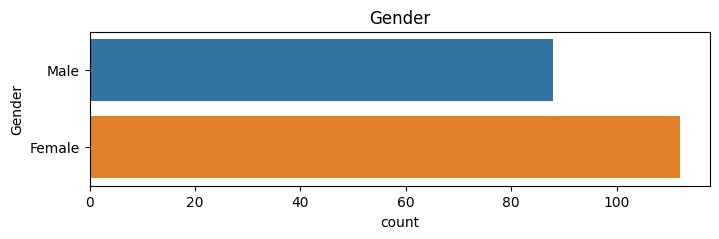

In [11]:
# Countplot
# This displays which Gender of people is spending more
plt.figure(figsize=(8,2))
sns.countplot(y = 'Gender' , data = df, hue = "Gender")
plt.title('Gender')
plt.show()

# Peple of "Female" gender is purchasing more

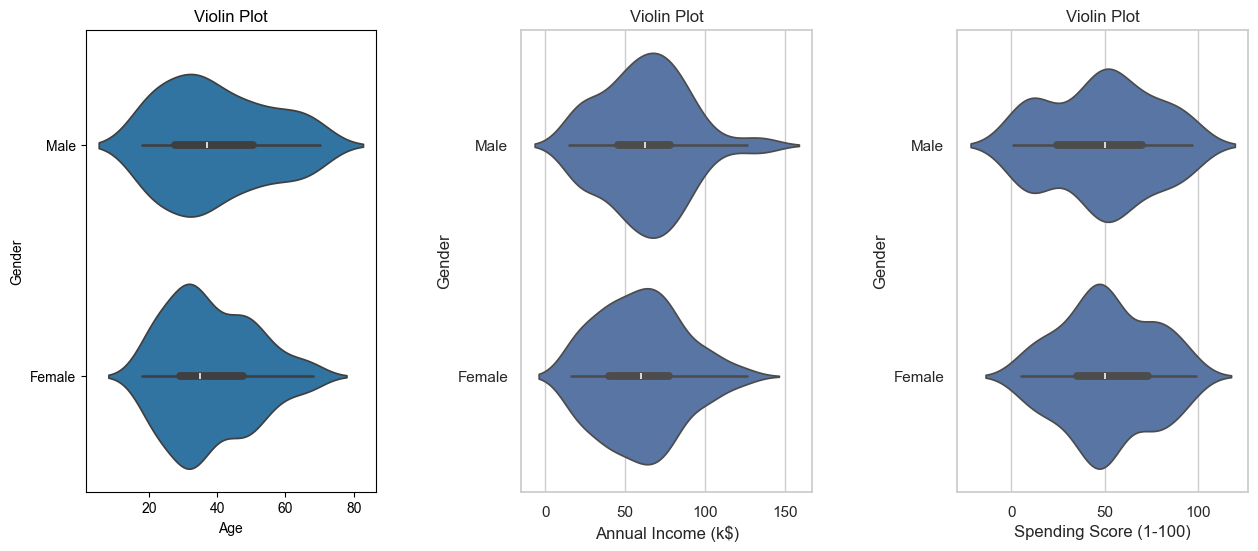

In [12]:
# Violinplot
# This display which gender of people with which age group and income level is spending more
plt.figure(1, figsize=(15,6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.violinplot(x = cols,y = 'Gender', data = df)
  plt.title('Violin Plot')
plt.ylabel('Gender')
plt.show()

# Male and female of Age group (30-40) is spending more.
# Male and female of Income (52-75)k$ is spending more.
# # Male and female with Spending score 50 is maximum.

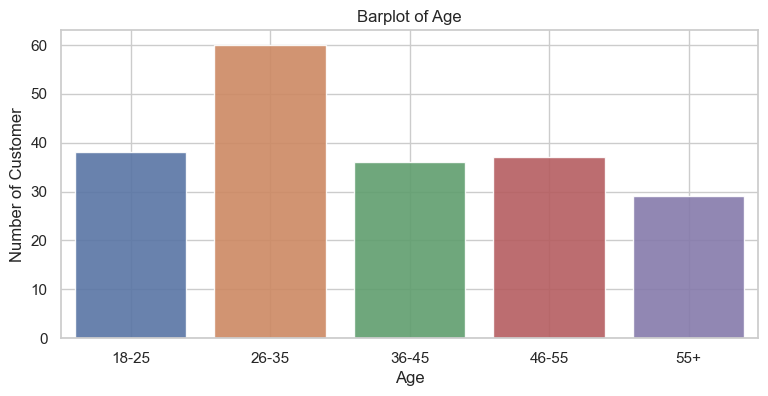

In [13]:
# Barplot
# This displays the number of customers in different Age group

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]

x = ['18-25', '26-35', '36-45','46-55','55+']
y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (9,4))
sns.barplot(x = x, y = y, hue = x, alpha=0.9)

plt.title('Barplot of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.grid(True)
plt.show()

# People of Age group(26-35) is more

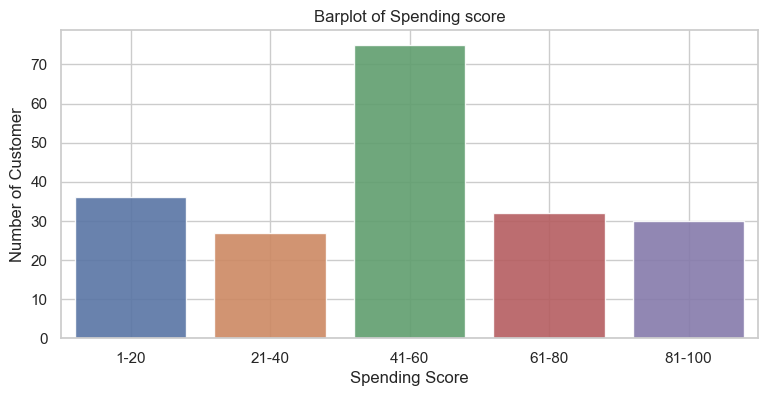

In [14]:
# Barplot
# This displays the number of customers in different Spending score group

ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

x = ['1-20','21-40','41-60','61-80','81-100']
y = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize = (9,4))
sns.barplot(x = x, y = y, hue = x, alpha=0.9)

plt.title('Barplot of Spending score')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customer')
plt.grid(True)
plt.show()

# People of Spending score (41-60) is more

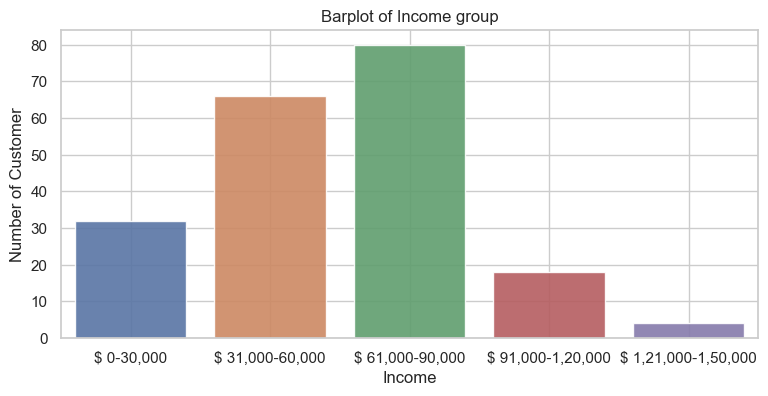

In [15]:
# Barplot
# This displays the number of customers in different income group

ann_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0 ) & (df['Annual Income (k$)'] <= 30)]
ann_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31 ) & (df['Annual Income (k$)'] <= 60)]
ann_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61 ) & (df['Annual Income (k$)'] <= 90)]
ann_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91 ) & (df['Annual Income (k$)'] <= 120)]
ann_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121 ) & (df['Annual Income (k$)'] <= 150)]

x = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
y = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]

plt.figure(figsize = (9,4))
sns.barplot(x = x, y = y, hue = x, alpha=0.9)

plt.title('Barplot of Income group')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.grid(True)
plt.show()

# People of Income ($ 61,000-90,000) is more

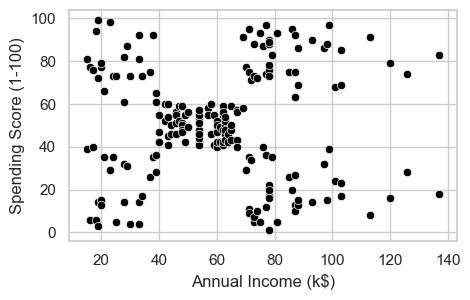

In [16]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, color = "black")
plt.show()

# **K-Means Clustering for ‘Age’ and ‘Spending Score’**

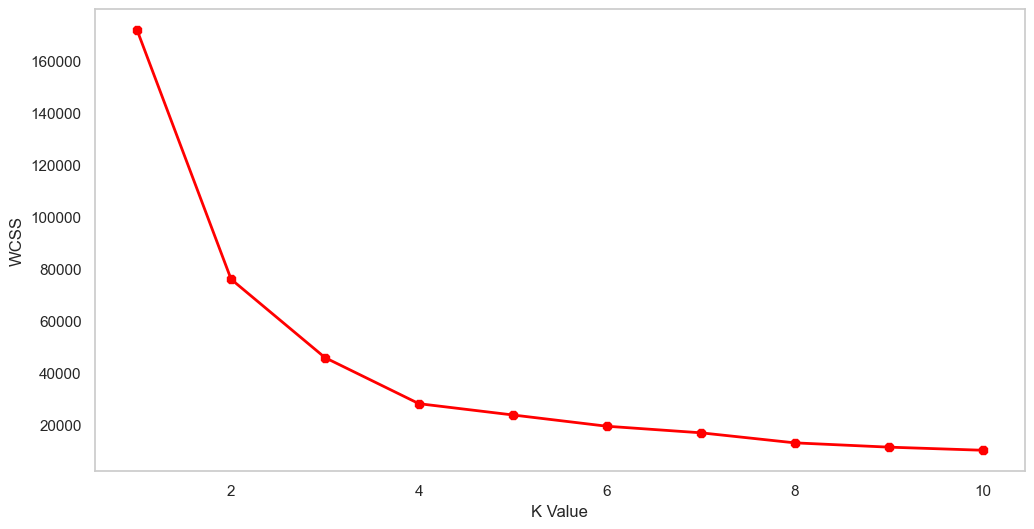

In [17]:
# Creating Clusters based on Age and Spending Score:
X1 = df.loc[:,['Age','Spending Score (1-100)']].values

wcss=[] # Within-Cluster Sum of Squares
for k in range(1,11):
  kmeans_model = KMeans(n_clusters = k, init = 'k-means++') # initialising k-means
  kmeans_model.fit(X1) # fitting each data-point of age and spending score to the kmeans model to identify k-th cluster for each data-point
  wcss.append(kmeans_model.inertia_) # WCSS of the model 

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [18]:
# kmeans_model.inertia_ refers to the Within-Cluster Sum of Squares (WCSS) in a K-Means clustering model. 
# It measures how well the clusters are formed by summing up the squared distances of each data point to its 
# assigned cluster centroid.

# Inertia_ quantifies how tightly the data points are grouped around their cluster centers.
# Lower inertia means better clustering because data points are closer to their centroids.
# When choosing the optimal number of clusters (k), the Elbow Method looks for the point where inertia stops 
# decreasing significantly

In [19]:
print(wcss)

[171535.50000000003, 75949.15601023019, 45844.536816269276, 28165.583566629342, 23830.9603937729, 19510.328802776163, 16989.44433583144, 13128.616437266439, 11481.771382562685, 10287.468169793174]


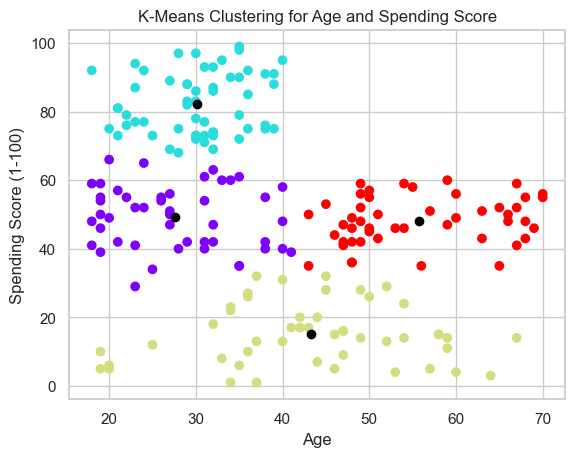

In [20]:
kmeans_model_4 = KMeans(n_clusters = 4)
cluster = kmeans_model_4.fit_predict(X1) # fitting each data-point of age and spending score to the kmeans model to identify k-th cluster for each data-point
plt.scatter(X1[:,0], X1[:,1], c = kmeans_model_4.labels_, cmap = 'rainbow')
plt.scatter(kmeans_model_4.cluster_centers_[:,0], kmeans_model_4.cluster_centers_[:,1], color = 'black')
plt.title('K-Means Clustering for Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [21]:
print(cluster)

[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [22]:
print(kmeans_model_4.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


# **K-Means Clustering for ‘Income’ and ‘Spending Score’**

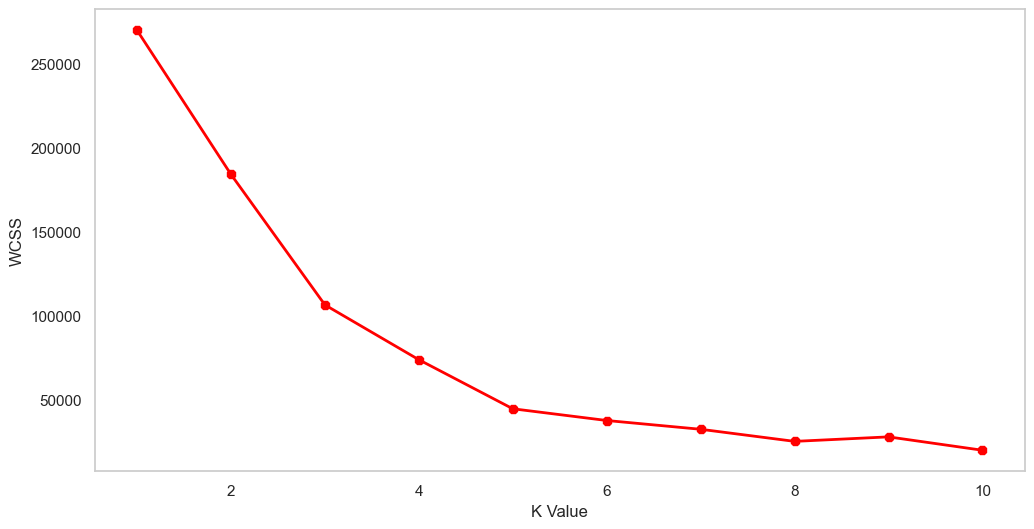

In [23]:
# Creating Clusters based on Income and Spending Score:
X2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

wcss=[] # Within-Cluster Sum of Squares
for k in range(1,11):
  kmeans_model = KMeans(n_clusters = k, init = 'k-means++') # initialising k-means
  kmeans_model.fit(X2) # fitting each data-point of income and spending score to the kmeans model to identify k-th cluster for each data-point
  wcss.append(kmeans_model.inertia_) # WCSS of the model 

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

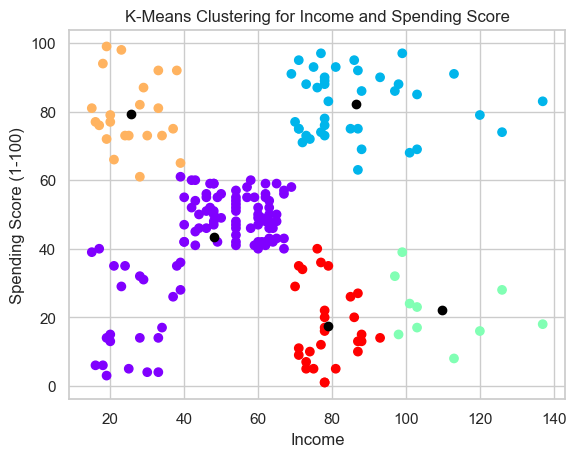

In [24]:
kmeans_model_5 = KMeans(n_clusters = 5)
cluster = kmeans_model_5.fit_predict(X2) # fitting each data-point of income and spending score to the kmeans model to identify k-th cluster for each data-point
plt.scatter(X2[:,0], X2[:,1], c = kmeans_model_5.labels_, cmap = 'rainbow')
plt.scatter(kmeans_model_5.cluster_centers_[:,0], kmeans_model_5.cluster_centers_[:,1], color = 'black')
plt.title('K-Means Clustering for Income and Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **K-Means Clustering for ‘Age’, ‘Income’ and ‘Spending Score’**

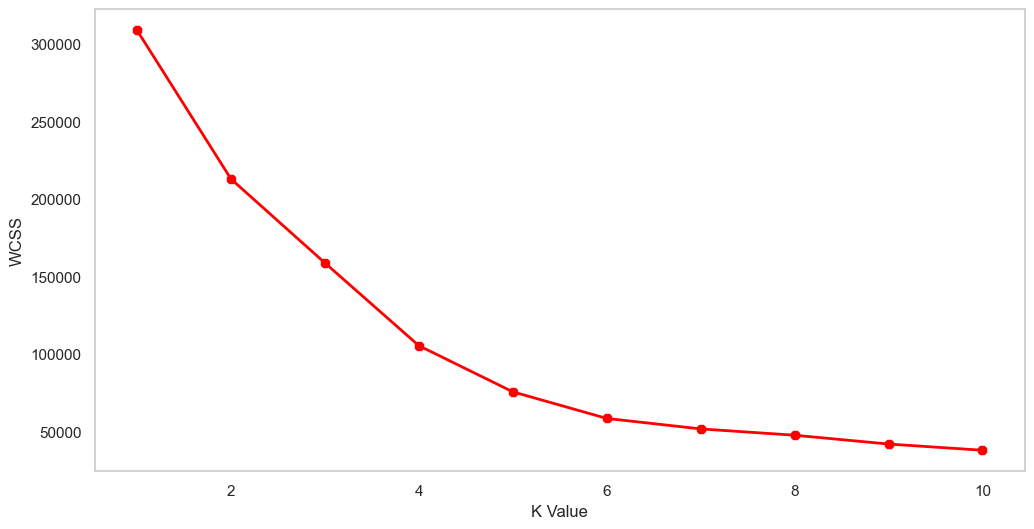

In [25]:
# Creating a Clusters based on Age, Annual Income, and Spending Score:
X3 = df.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans_model = KMeans(n_clusters = k, init = 'k-means++')
  kmeans_model.fit(X3)
  wcss.append(kmeans_model.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

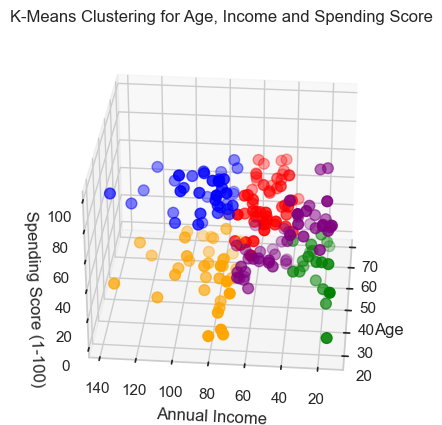

In [26]:
kmeans_model_5 = KMeans(n_clusters = 5)
cluster = kmeans_model_5.fit_predict(X3)

from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans_model_5.fit_predict(X3)
df['label'] = clusters


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.title('K-Means Clustering for Age, Income and Spending Score')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

# **Before K-Means & After K-Means**

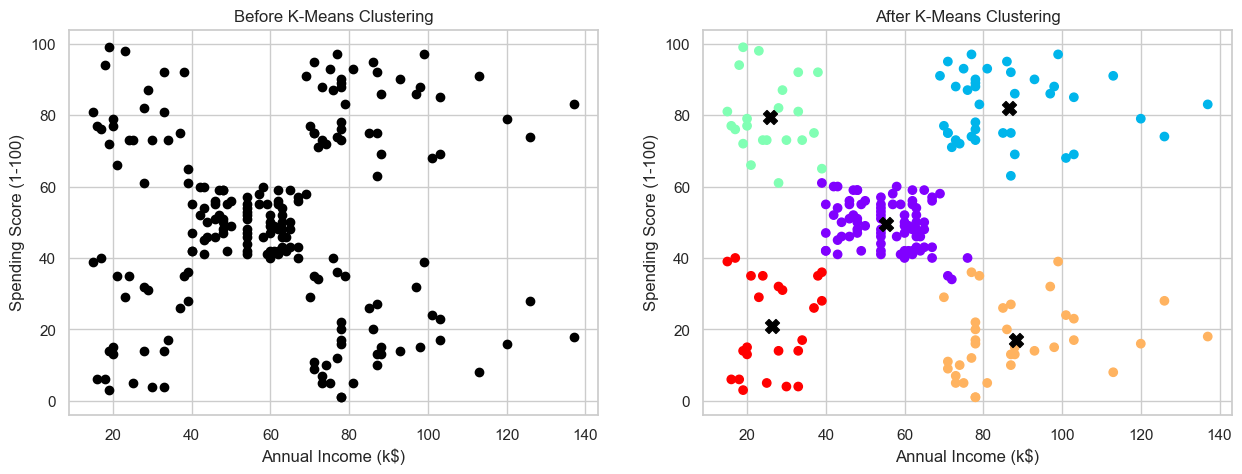

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

fig, ax = plt.subplots(1, 2, figsize=(15,5))  # Adjusted size for better visibility

# Before K-Means Clustering
#sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color="black", ax=ax[0])
ax[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color="black")
ax[0].set_title("Before K-Means Clustering")
ax[0].set_xlabel('Annual Income (k$)')
ax[0].set_ylabel('Spending Score (1-100)')

# K-Means Clustering
kmeans_model_5 = KMeans(n_clusters=5, random_state=42)
cluster = kmeans_model_5.fit_predict(X2)

# After Clustering
ax[1].scatter(X2[:,0], X2[:,1], c=kmeans_model_5.labels_, cmap='rainbow')
ax[1].scatter(kmeans_model_5.cluster_centers_[:,0], kmeans_model_5.cluster_centers_[:,1], color='black', marker='X', s=100)
ax[1].set_title("After K-Means Clustering")
ax[1].set_xlabel('Annual Income (k$)')
ax[1].set_ylabel('Spending Score (1-100)')

plt.show()

# **Summary**

We downloaded, explored, performed EDA(Exploratory Data Analysis), observed for any missing values and trained the model with K-Means to search the best cluster for each data point for proper Segmentation of Customers of the mall.

- Total Dataset contains 200 rows and 5 columns.
- After Data processing it has 200 rows and 4 columns.
- Performed Exploratory Data Analysis.
- Searched the optimum number of clusters for Age and Spening Score where wcss is significantly low.
- Used that number of clusters to cluster Age and Spening Score in 2D plane.
- Searched the optimum number of clusters for Income and Spening Score where wcss is significantly low.
- Used that number of clusters to cluster Income and Spening Score in 2D plane.
- Searched the optimum number of clusters for Age, Income and Spening Score where wcss is significantly low.
- Used that number of clusters to cluster Age, Income and Spening Score in 3D plane.
- We used `Unsupervised Machine Learning algorithm i.e. K-Means Clustering` for Customer Segmentation.

### **Atlast compared the `Scatter plot before Clustering` and `Scatter plot after Clustering`.**

# **Thank You 😊**